
Dataset loaded successfully

Choose what you want to do :
1. Summary Statistics
2. Data Quality Check
3. Time Series Analysis
4. Correlation Analysis:
5. Wind Analysis
6. Temperature Analysis
7. Histograms
8. Z-Score Analysis
9. Bubble charts
10. Data Cleaning



Enter your choice (1-10):  7



 Histogram :


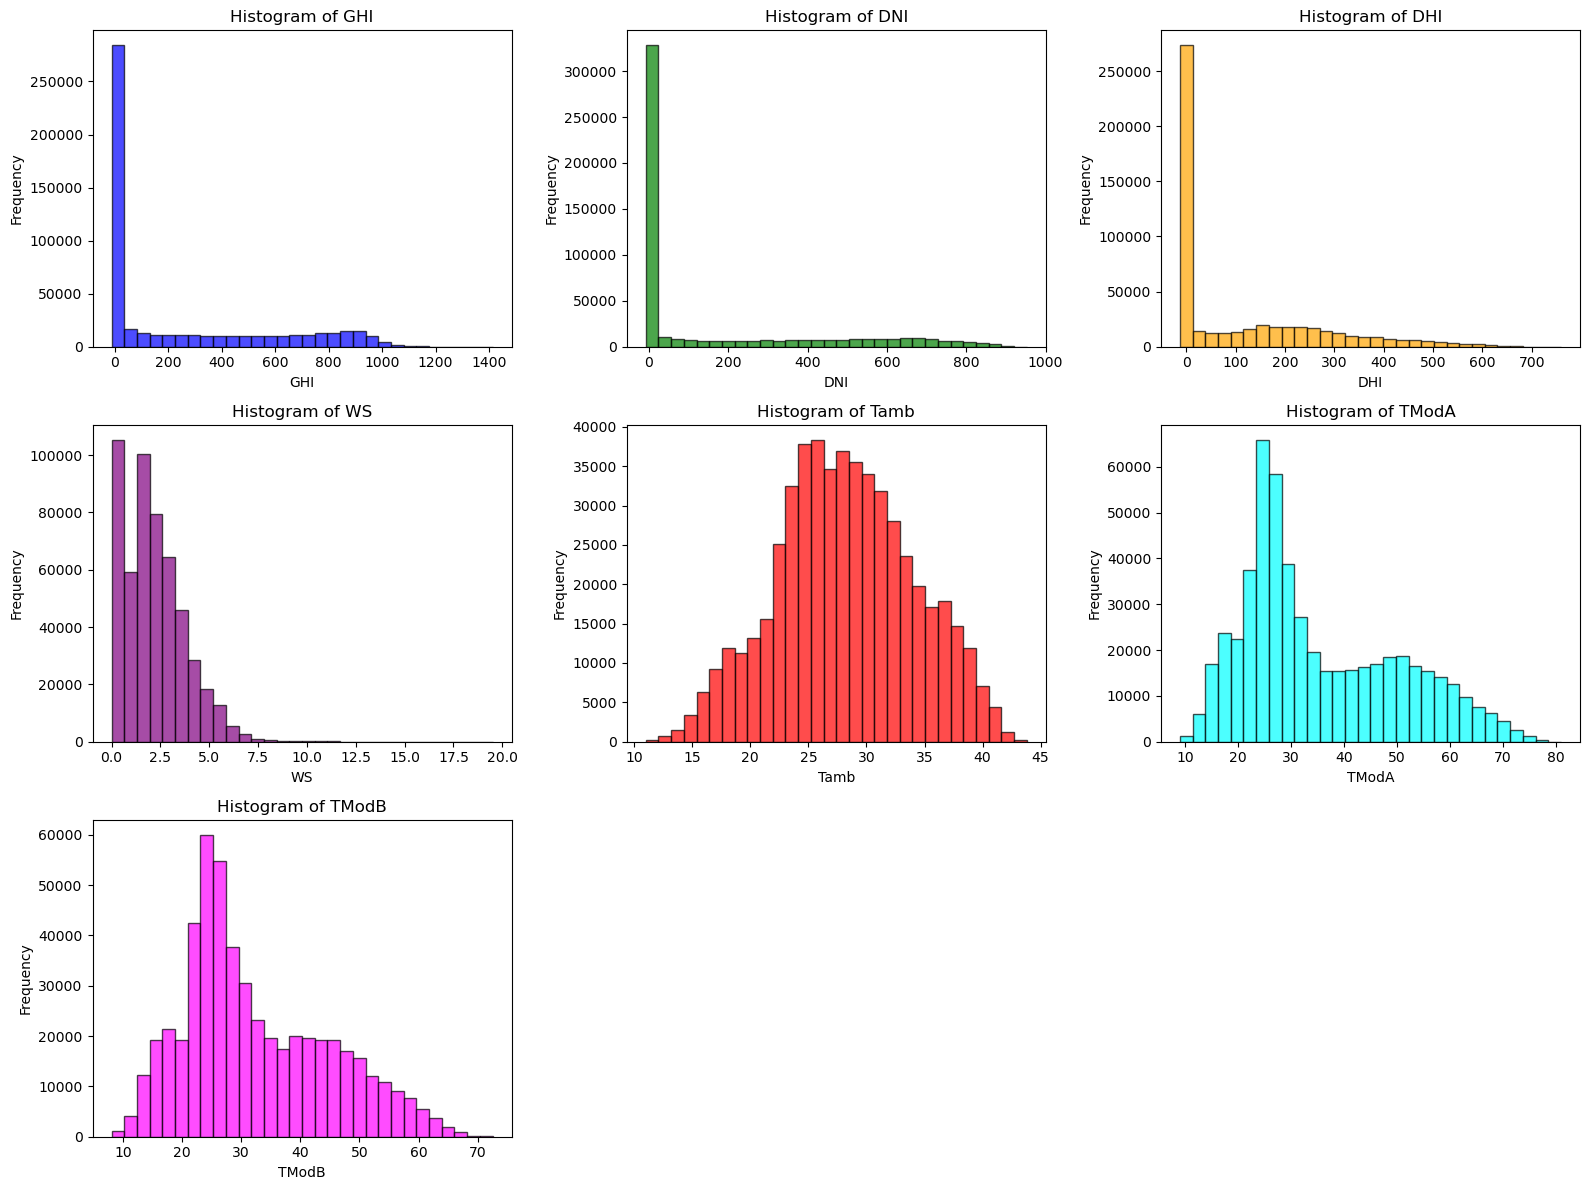

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
from windrose import WindroseAxes

datasets = {
    '1': './data/benin-malanville.csv',          
    '2': './data/sierraleone-bumbuna.csv',   
    '3': './data/togo-dapaong_qc.csv'           
}

def menu():
    # Load the dataset once
    dataset_choice = '1'
    dataset_path = datasets[dataset_choice]
    try:
        data = pd.read_csv(dataset_path)
        print("\nDataset loaded successfully")
        print("\nChoose what you want to do :")
        print("1. Summary Statistics")
        print("2. Data Quality Check")
        print("3. Time Series Analysis")
        print("4. Correlation Analysis:")
        print("5. Wind Analysis")
        print("6. Temperature Analysis")
        print("7. Histograms")
        print("8. Z-Score Analysis")
        print("9. Bubble charts")
        print("10. Data Cleaning")

        task_choice = input("\nEnter your choice (1-10): ").strip()
        task_choice = int(task_choice)
        if 1 <= task_choice <= 10:
            match task_choice:
                case 1:
                    summary_stat(data)
                case 2:
                   quality_check(data)
                case 3:
                   time_series_analysis(data)
                case 4:
                    correlation_analysis(data)
                case 5:
                    wind_analysis(data)
                case 6:
                    print("Temperature Analysis Task")
                    temp_analysis(data)
                case 7:
                    histogram(data)
                case 8:
                    Z_score_analysis(data)
                case 9:
                    bubble_analysis(data)
                case 10:
                    data_cleaning(data)
                case _:
                    print("Invalid task choice.")
        else: 
            print("Invalid task choice. Please enter a number between 1 and 10.")

    except Exception as e:
        print("\nError reading dataset: {e}")
        return None
          
def summary_stat(data):
    print("\nSummary Statistics:")
    print(data.info())
    print("shape: ", data.shape)
    summary_stats = data.describe()
    print("Summary Statistics:\n", summary_stats)
    columns = data.columns.tolist()
    print("Column Names:\n", columns)

    # Calculate the mean, median, standard deviation,and other statistical measures 
    mean_values = data.mean(skipna=True, numeric_only=True)
    median_values = data.median(skipna=True, numeric_only=True)
    std_deviation = data.std(skipna=True, numeric_only=True)
    range_values = data.max(skipna=True, numeric_only=True) - data.min(skipna=True, numeric_only=True)
        
    print("\nMean:\n", mean_values)
    print("\nMedian:\n", median_values)
    print("\nStandard Deviation:\n", std_deviation)
    print("\nRange:\n", range_values)
   
def quality_check(data):
    print("\nData Quality Check:")
    # Identify missing values
    missing_values = data.isnull().sum()
    print("Missing Values:\n", missing_values)

    # Check for negative or out-of-range values in GHI, DNI, DHI
    ghi_invalid = data[data['GHI'] < 0]
    dni_invalid = data[data['DNI'] < 0]
    dhi_invalid = data[data['DHI'] < 0]

    # Prints the number of rows with invalid GHI values
    print("\nInvalid GHI Entries: ", ghi_invalid.shape)  
    print("\nInvalid DNI Entries :", dni_invalid.shape)
    print("\nInvalid DHI Entries:", dhi_invalid.shape)

    ghi_outliers = detect_outliers(data['GHI'])
    dni_outliers = detect_outliers(data['DNI'])
    dhi_outliers = detect_outliers(data['DHI'])

    print("\nOutliers in GHI:\n", ghi_outliers)
    print("\nOutliers in DNI:\n", dni_outliers)
    print("\nOutliers in DHI:\n", dhi_outliers)
    
    # Outliers for sensors and wind speed
    moda_outliers = detect_outliers(data['ModA'])
    modb_outliers = detect_outliers(data['ModB'])
    ws_outliers = detect_outliers(data['WS'])
    wsgust_outliers = detect_outliers(data['WSgust'])
  
    print("\nOutliers in ModA:\n", moda_outliers)
    print("\nOutliers in ModB:\n", modb_outliers)
    print("\nOutliers in WS:\n", ws_outliers)
    print("\nOutliers in WSgust:\n", wsgust_outliers)

    # Boxplots for visual outlier detection
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']], orient='h', palette='coolwarm')
    plt.title("Boxplot of Key Variables")
    plt.show()

def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

def time_series_analysis(data):
    print("\n Time Series Analysis :")
    # Convert 'Timestamp' column to datetime
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
    data.set_index('Timestamp', inplace=True)

    # Plot time series for GHI, DNI, DHI, and Tamb
    plt.figure(figsize=(12, 8))

    # Plot GHI
    plt.subplot(2, 2, 1)
    plt.plot(data['GHI'], label="GHI", color="blue")
    plt.title("Global Horizontal Irradiance (GHI) Over Time")
    plt.xlabel("Time")
    plt.ylabel("GHI")
    plt.legend()

    # Plot DNI
    plt.subplot(2, 2, 2)
    plt.plot(data['DNI'], label="DNI", color="orange")
    plt.title("Direct Normal Irradiance (DNI) Over Time")
    plt.xlabel("Time")
    plt.ylabel("DNI")
    plt.legend()

    # Plot DHI
    plt.subplot(2, 2, 3)
    plt.plot(data['DHI'], label="DHI", color="green")
    plt.title("Diffuse Horizontal Irradiance (DHI) Over Time")
    plt.xlabel("Time")
    plt.ylabel("DHI")
    plt.legend()

    # Plot Tamb
    plt.subplot(2, 2, 4)
    plt.plot(data['Tamb'], label="Tamb", color="red")
    plt.title("Ambient Temperature (Tamb) Over Time")
    plt.xlabel("Time")
    plt.ylabel("Temperature (°C)")
    plt.legend()

    plt.tight_layout()
    plt.show()
    
def correlation_analysis(data):
    print("\n Correlation Analysis :")
     # Select relevant columns for correlation analysis
    columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
    correlation_matrix = data[columns].corr()

    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix: Solar Radiation and Temperature")
    plt.show()

    # Scatter Matrix for Wind Conditions and Solar Irradiance
    wind_solar_columns = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']
    scatter_data = data[wind_solar_columns].dropna()
    scatter_data = scatter_data.sample(n=min(len(scatter_data), 500), random_state=42)
    scatter_matrix(scatter_data, figsize=(12, 8), alpha=0.7, diagonal='hist')
    plt.suptitle("Scatter Matrix: Wind Conditions and Solar Irradiance")
    
    plt.tight_layout()
    plt.show()

def wind_analysis(data):
    print("\n Wind Analysis :")     
    # Remove missing or infinite values in wind data
    wind_data = data[['WS', 'WD']].dropna()
    wind_data = wind_data[~wind_data.isin([float('inf'), float('-inf')]).any(axis=1)]
    wind_data = wind_data[(wind_data['WD'] >= 0) & (wind_data['WD'] <= 360)]
    # Create wind rose plot
    fig = plt.figure(figsize=(8, 8))
    ax = WindroseAxes.from_ax(fig=fig)

    # Create the wind rose using wind speed and direction
    ax.bar(wind_data['WD'], wind_data['WS'], bins=16, edgecolor='black')

    ax.set_title("Wind Rose: Wind Speed and Direction Distribution")
    ax.set_legend(title="Wind Speed (m/s)")
    plt.show()

def temp_analysis(data):
    print("\n Temperature Analysis :")     
    temp_rh_data = data[['RH', 'Tamb', 'TModA', 'TModB', 'GHI', 'DNI', 'DHI']].dropna()

    # Calculate correlation matrix
    correlation_matrix = temp_rh_data.corr()
    # Plot a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix: RH, Temperature, and Solar Radiation")
    plt.show()

def histogram(data):
    print("\n Histogram :")  
    # Selecting the relevant columns and dropping missing values
    hist_data = data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']].dropna()
    variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']
    colors = ['blue', 'green', 'orange', 'purple', 'red', 'cyan', 'magenta']

    plt.figure(figsize=(16, 12))

    # Plot each variable in a loop
    for i, var in enumerate(variables):
        plt.subplot(3, 3, i + 1)  # Create a grid of subplots
        plt.hist(hist_data[var], bins=30, color=colors[i], alpha=0.7, edgecolor='black')
        plt.title(f'Histogram of {var}')
        plt.xlabel(var)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

def Z_score_analysis(data):
    print("\n Z-Score Analysis :") 
    # Select numeric columns for Z-score calculation
    numeric_data = data.select_dtypes(include=[np.number])

    # Calculate Z-scores
    z_scores = (numeric_data - numeric_data.mean()) / numeric_data.std()

    # Add Z-scores to the dataset for review (optional)
    data_with_zscores = pd.concat([data, z_scores.add_suffix('_zscore')], axis=1)

    # Boxplot to visualize outliers
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=z_scores)
    plt.title("Z-Score Distribution")
    plt.ylabel("Z-Score")
    plt.xticks(rotation=45)
    plt.show()

def bubble_analysis(data):
    print("\n Bubble Analysis :") 
    # Select relevant columns and drop missing values
    bubble_data = data[['GHI', 'Tamb', 'WS', 'RH', 'BP']].dropna()
    # Assign variables for axes and bubble size
    x = bubble_data['GHI'] 
    y = bubble_data['Tamb']  
    bubble_size = bubble_data['RH']  
    color = bubble_data['WS']  

    plt.figure(figsize=(12, 8))

    # Bubble chart
    scatter = plt.scatter(x, y, s=bubble_size * 10, c=color, cmap='viridis', alpha=0.7, edgecolor='black')
    cbar = plt.colorbar(scatter)
    cbar.set_label('Wind Speed (WS)')

    plt.xlabel('GHI (Global Horizontal Irradiance)')
    plt.ylabel('Tamb (Ambient Temperature)')
    plt.title('Bubble Chart: GHI vs Tamb vs WS')
    plt.grid(True)

    plt.show()

def data_cleaning(data):
    print("\n Data Cleaning Process:")

    # Identify and drop columns with all null values
    null_columns = data.columns[data.isnull().all()]
    if not null_columns.empty:
        print("\nColumns entirely null and dropped: {list(null_columns)}")
        data = data.drop(columns=null_columns)

     # Handle missing values in numeric columns
    numeric_cols = data.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        missing_count = data[col].isnull().sum()
        if missing_count > 0:
            median_value = data[col].median()
            print("\nFilling {missing_count} missing values in '{col}' with median value: {median_value}")
            data[col] = data[col].fillna(median_value)

    # Handle missing values in categorical columns
    categorical_cols = data.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        missing_count = data[col].isnull().sum()
        if missing_count > 0:
            mode_value = data[col].mode()[0] if not data[col].mode().empty else "Unknown"
            print("\nFilling {missing_count} missing values in '{col}' with mode value: {mode_value}")
            data[col] = data[col].fillna(mode_value)

    # Handle outliers in numeric columns using Z-score method
    from scipy.stats import zscore
    z_scores = data[numeric_cols].apply(zscore, nan_policy='omit')
    outliers = (z_scores.abs() > 3)
    for col in numeric_cols:
        outlier_count = outliers[col].sum()
        if outlier_count > 0:
            print(f"Handling {outlier_count} outliers in '{col}'")
            upper_limit = data[col].quantile(0.99)
            lower_limit = data[col].quantile(0.01)
            data[col] = data[col].clip(lower=lower_limit, upper=upper_limit)


menu()